In [1]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet
from sklearn.linear_model import LinearRegression

## Data Loading and Visualization

In [2]:
# Read salary data
file_path_store3 = Path('../data/store3_data.csv')
df_store3_data = pd.read_csv(file_path_store3)

# Display sample data
df_store3_data.head()

,date,Sales,Gallons
0,2007-11-19,0.00,NaN
1,2007-11-26,4697.64,148.0
2,2007-12-03,3233.57,88.0
3,2007-12-10,4526.86,133.0
4,2007-12-17,7291.96,250.0


In [3]:
df_store3_data['date'] = pd.to_datetime(df_store3_data['date'])

df_store3_data['date_numeric'] = df_store3_data['date'].astype('int64')



In [4]:
df_store3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          992 non-null    datetime64[ns]
 1   Sales         990 non-null    float64       
 2   Gallons       989 non-null    float64       
 3   date_numeric  992 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 31.1 KB


<Axes: title={'center': 'Expected Sales based on date'}, xlabel='date', ylabel='Sales'>

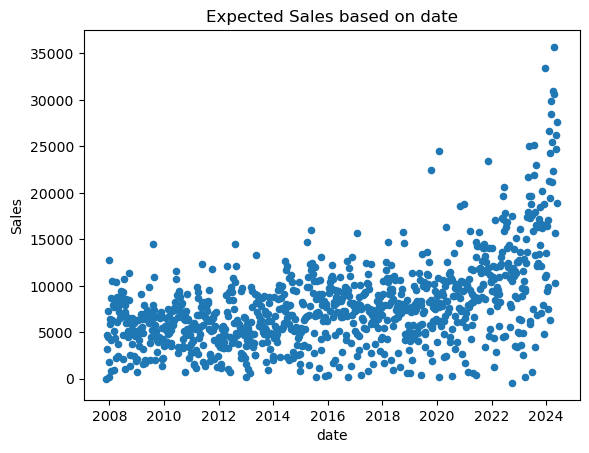

In [5]:
# Create a scatter plot with the sales information
df_store3_data.plot.scatter(
    x = 'date'   ,
    y = 'Sales'     ,
    title = 'Expected Sales based on date'
)


<Axes: title={'center': 'Expected Sales based on date'}, xlabel='date', ylabel='Gallons'>

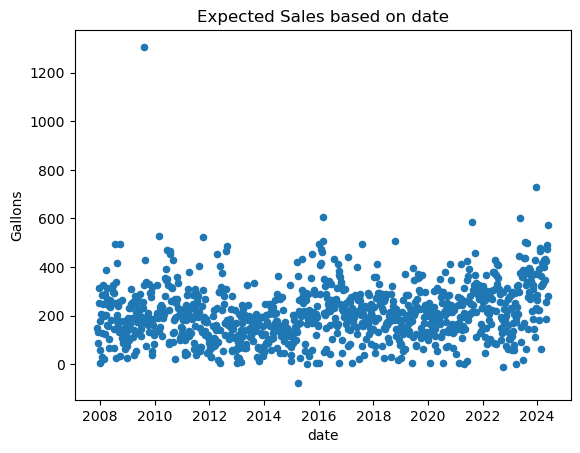

In [6]:
# Create a scatter plot with the Gallons information
df_store3_data.plot.scatter(
    x = 'date'   ,
    y = 'Gallons'     ,
    title = 'Expected Sales based on date'
)

In [7]:
df_store3_data.head()

,date,Sales,Gallons,date_numeric
0,2007-11-19,0.00,NaN,1195430400000000000
1,2007-11-26,4697.64,148.0,1196035200000000000
2,2007-12-03,3233.57,88.0,1196640000000000000
3,2007-12-10,4526.86,133.0,1197244800000000000
4,2007-12-17,7291.96,250.0,1197849600000000000


In [8]:
df_store3_data.tail()

,date,Sales,Gallons,date_numeric
987,2024-04-29,15687.08,256.0,1714348800000000000
988,2024-05-06,26200.68,492.0,1714953600000000000
989,2024-05-13,24729.34,473.0,1715558400000000000
990,2024-05-20,27596.85,571.0,1716163200000000000
991,2024-05-27,18877.38,281.0,1716768000000000000


## Data Preparation to Fit the Linear Regression Model

In [9]:
# df_store3_data = df_store3_data.drop(index=0)

df_store3_data = df_store3_data.dropna()

In [10]:
df_store3_data.head()

,date,Sales,Gallons,date_numeric
1,2007-11-26,4697.64,148.0,1196035200000000000
2,2007-12-03,3233.57,88.0,1196640000000000000
3,2007-12-10,4526.86,133.0,1197244800000000000
4,2007-12-17,7291.96,250.0,1197849600000000000
5,2007-12-24,12813.24,313.0,1198454400000000000


In [11]:
df_store3_data.tail()

,date,Sales,Gallons,date_numeric
987,2024-04-29,15687.08,256.0,1714348800000000000
988,2024-05-06,26200.68,492.0,1714953600000000000
989,2024-05-13,24729.34,473.0,1715558400000000000
990,2024-05-20,27596.85,571.0,1716163200000000000
991,2024-05-27,18877.38,281.0,1716768000000000000


In [12]:
# Create the X set by using the 'reshape' function 
# X = df_store3_data['Sales'].values.reshape(-1,1)
X = df_store3_data[['date_numeric']].values.reshape(-1,1)
# Display sample data
X[:5]

array([[1196035200000000000],
       [1196640000000000000],
       [1197244800000000000],
       [1197849600000000000],
       [1198454400000000000]], dtype=int64)

In [13]:
df_store3_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 1 to 991
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          989 non-null    datetime64[ns]
 1   Sales         989 non-null    float64       
 2   Gallons       989 non-null    float64       
 3   date_numeric  989 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 38.6 KB


In [14]:
# Create an array for the dependent variable y with the sales data
# y = df_store3_data
y = df_store3_data['Sales']

## Build the Linear Regression Model

In [15]:
# Create a model with scikit-learn
model = LinearRegression()

In [16]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [17]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [1.55931076e-14]


In [18]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -14858.820128531808


In [19]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -14858.820128531808 + 1.5593107611409218e-14X


In [20]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [21]:
# Create a copy of the original data
df_store3_predicted = df_store3_data.copy()

# Add a column with the predicted sales values
df_store3_predicted["sales_predicted"] = predicted_y_values

# Display sample data
df_store3_predicted.head()

,date,Sales,Gallons,date_numeric,sales_predicted
1,2007-11-26,4697.64,148.0,1196035200000000000,3791.085452
2,2007-12-03,3233.57,88.0,1196640000000000000,3800.516164
3,2007-12-10,4526.86,133.0,1197244800000000000,3809.946875
4,2007-12-17,7291.96,250.0,1197849600000000000,3819.377587
5,2007-12-24,12813.24,313.0,1198454400000000000,3828.808298


<Axes: xlabel='date'>

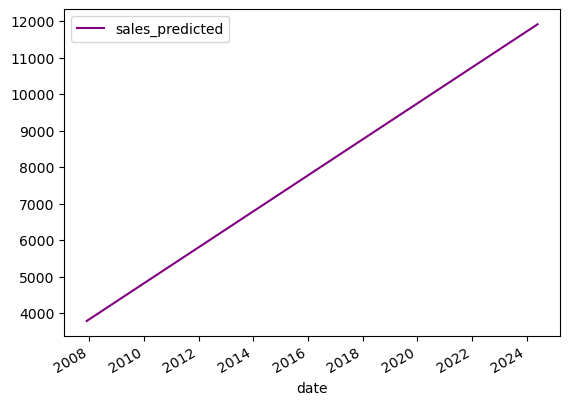

In [22]:
# Create a line plot of the predicted sales values
best_fit_line = df_store3_predicted.plot.line(
    x = "date",
    y = "sales_predicted",
    color = "purple"
)
best_fit_line

<Axes: xlabel='date'>

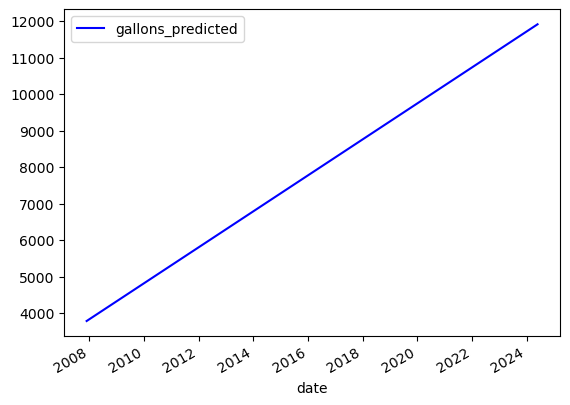

In [23]:
predicted_y_gallon_values = model.predict(X)

# Create a copy of the original data
df_store3_gallons_predicted = df_store3_data.copy()

# Add a column with the predicted sales values
df_store3_gallons_predicted["gallons_predicted"] = predicted_y_gallon_values

# Display sample data
df_store3_gallons_predicted.head()

# Create a line plot of the predicted sales values
best_fit_line_gallons = df_store3_gallons_predicted.plot.line(
    x = "date",
    y = "gallons_predicted",
    color = "blue"
)
best_fit_line_gallons